# Buổi 7: Thuật toán sắp sếp (phần 3)
- Tìm hiểu về thuật toán "Counting Sort"

In [1]:
import matplotlib.pyplot as plt

def show_list(arr, title = ""):
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.bar(range(len(arr)), arr)
    ax.set_title(title)
    ax.set_xlabel('index')
    ax.set_ylabel('value')
    ax.set_xticks(range(len(arr)))
    plt.show()


Bài toán: Counting sort giải quyết bài toán sắp xếp dãy có ít giá trị riêng biệt

Cách tiếp cận: 
1. Duyệt qua dãy để đếm số lần xuất hiện của từng giá trị.
2. Sử dụng các giá trị đếm được để đưa các phần tử vào dãy mới theo thứ tự đã sắp xếp.

VD: Ta cần sắp xếp dãy [1,4,1,2,7,5,2] chứa các giá trị từ 0 đến 7.
Bước 1: Tạo mảng "count" chứa số lần xuất hiện của mỗi phần tử:

        i: 0    1   2   3   4   5   6   7
 Count[i]: 0    2   2   0   1   1   0   1


Bước 2: Duyệt "count" theo thứ tự từ đầu đến cuối để đưa các giá trị vào dãy mới
sorted_arr = []
i = 0;  count[0] = 0 => sorted_arr = []
i = 1;  count[1] = 2 => sorted_arr = [1, 1]
i = 2;  count[2] = 2 => sorted_arr = [1, 1, 2, 2]
...
i = 7;  count[7] = 1 => sorted_arr = [1, 1, 2, 2, 4, 5, 7]



In [5]:
def counting_sort(arr):
    if len(arr) <= 0:
        return 

    ## lấy ra giá trị lớn nhất của arr
    max_val = max(arr)
    
    ## Tạo ra 1 list mảng gồm max(arr) + 1 số 0
    count = [0] * (max_val + 1)
    
    for el in arr: #[1, 2, 4, 0, 70]
        count[el] += 1
    
    
    ## Từ count => cập nhật vào arr
    index = 0
    for i in range(max_val + 1):
        for j in range(count[i]):
            arr[index] = i
            index += 1

Before sorting: [5, 7, 6, 5, 9, 6, 8, 4, 1, 0]
After sorting: [0, 1, 4, 5, 5, 6, 6, 7, 8, 9]


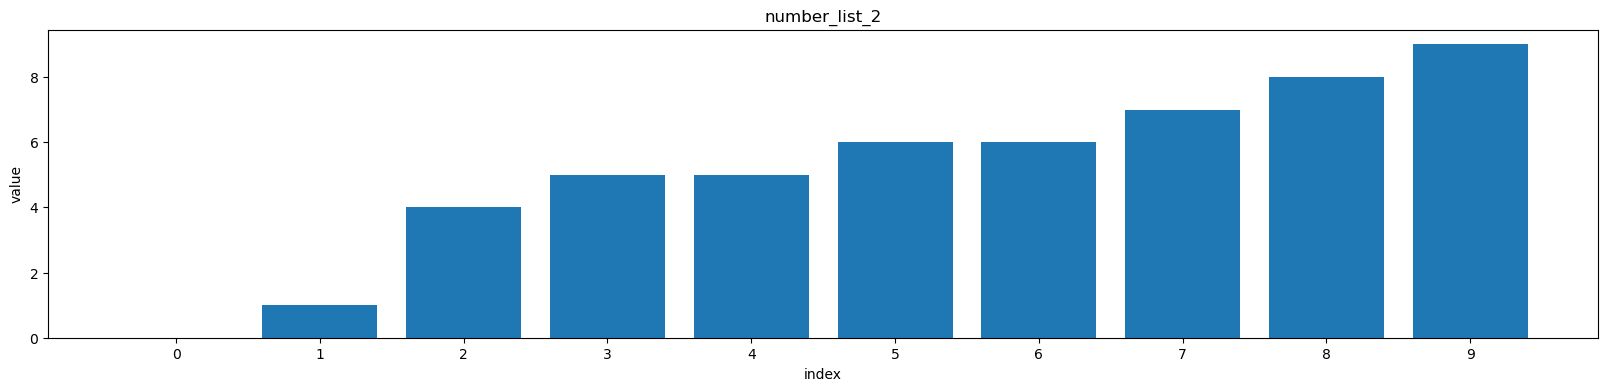

In [6]:
number_list = [5,7,6,5,9,6,8,4,1,0]

number_list_2 = number_list[:]

# gọi hàm sắp xếp đếm
counting_sort(number_list_2)

print("Before sorting: {}".format(number_list))
print("After sorting: {}".format(number_list_2))
show_list(number_list_2, title="number_list_2")



## Thực hành 
### Bài 1: Counting Sort trên số âm
Yêu cầu: Cho một dãy gồm n số nguyên, mỗi số ó giá trị trong khoảng [-99, 99]. Hãy chỉnh sửa thuật toán Counting Sort để sắp xếp dãy trên theo thứ tự tăng dần.

Gợi ý: Ta có thể xem khoảng giá trị [-99, 99] tương tự như khoảng từ [0; 198] bằng cách cộng 99 vào mỗi phần tử.

In [7]:
number_list_3 = [5, 9, -1, 12, -30, 35, -75, 10, 15, -20, 4, 0, -20, 0,  -20, -3, 6, -14]

In [8]:
def counting_sort_negative(arr):
    if len(arr) <= 0:
        return 

    ## lấy ra giá trị lớn nhất của arr
    max_val = max(arr)
    ## lấy ra giá trị nhỏ nhất của arr
    min_val = min(arr)
    
    val_range = max_val - min_val + 1
    
    
    ## Tạo ra 1 list mảng
    count = [0] * val_range
    
    for el in arr: #[1, 2, 4, 0, 70]
        count[el - min_val] += 1
    
    
    ## Từ count => cập nhật vào arr
    index = 0
    for i in range(val_range):
        for j in range(count[i]):
            arr[index] = i + min_val
            index += 1

Before sorting: [5, 9, -1, 12, -30, 35, -75, 10, 15, -20, 4, 0, -20, 0, -20, -3, 6, -14]
After sorting: [-75, -30, -20, -20, -20, -14, -3, -1, 0, 0, 4, 5, 6, 9, 10, 12, 15, 35]


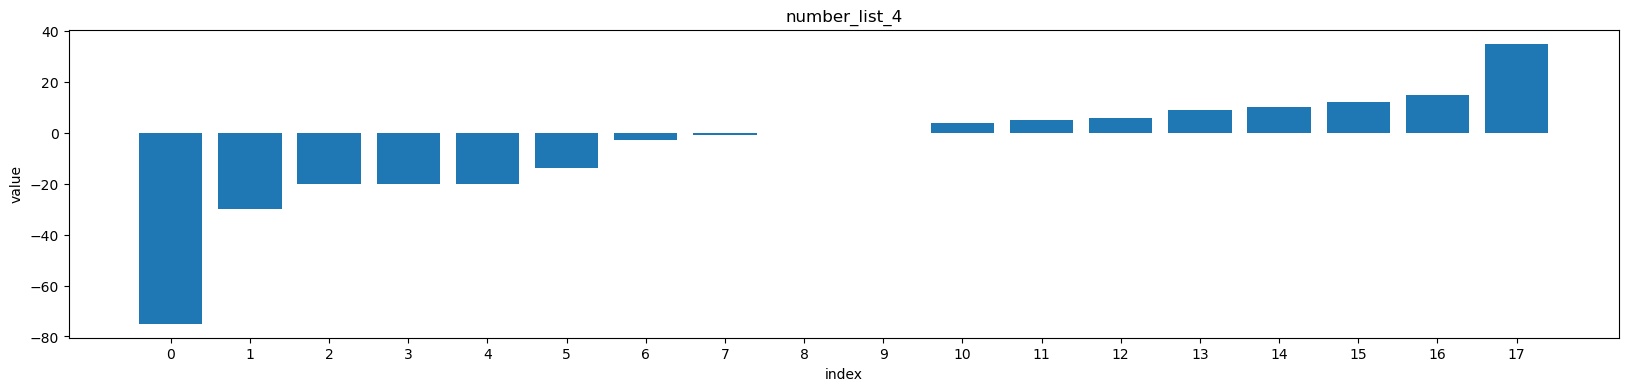

In [9]:
number_list_4 = number_list_3[:]

# gọi hàm sắp xếp số âm
counting_sort_negative(number_list_4)

print("Before sorting: {}".format(number_list_3))
print("After sorting: {}".format(number_list_4))
show_list(number_list_4, title="number_list_4")

## Bài thực hành 2: 
Bài toán sắp xếp điểm:

Yêu cầu: Cho danh sách điểm của học sinh với định dạng dưới đây. Hãy sắp xếp danh sách theo thứ tự điểm "Toán tăng dần". Biết danh sách có thể có điểm của 0 < n < 106 học sinh, mỗi điểm được làm tròn đến số nguyên từ 0 - 10

In [10]:
student_grade_list = [
    {'id': 984, 'math': 9, 'literature': 5},
    {'id': 12, 'math': 10, 'literature': 4},
    {'id': 324, 'math': 10, 'literature': 5},
    {'id': 890, 'math': 5, 'literature': 7},
    {'id': 223, 'math': 8, 'literature': 5},
    {'id': 543, 'math': 8, 'literature': 8},
]

In [11]:
def counting_sort_grade_v1(arr):
    
    if len(arr) <= 1:
        return 
    
    
    val_range = 11
    
    indices = [[] for i in range(val_range)]
    
    for i, grade in enumerate(arr):
        indices[grade['math']].append(i)
        
        
    sorted_arr = [None] * len(arr)
    index = 0 
    for i in range(val_range):
        for original_index in indices[i]:
            sorted_arr[index] = arr[original_index]
            index += 1
    
    return sorted_arr
    
        
    
    

In [13]:
student_grade_list_2 = student_grade_list[:]

student_grade_list_2 = counting_sort_grade_v1(student_grade_list_2)

print("Before Sorting")
print(student_grade_list)
print("After Sorting")
print(student_grade_list_2)


Before Sorting
[{'id': 984, 'math': 9, 'literature': 5}, {'id': 12, 'math': 10, 'literature': 4}, {'id': 324, 'math': 10, 'literature': 5}, {'id': 890, 'math': 5, 'literature': 7}, {'id': 223, 'math': 8, 'literature': 5}, {'id': 543, 'math': 8, 'literature': 8}]
After Sorting
[{'id': 890, 'math': 5, 'literature': 7}, {'id': 223, 'math': 8, 'literature': 5}, {'id': 543, 'math': 8, 'literature': 8}, {'id': 984, 'math': 9, 'literature': 5}, {'id': 12, 'math': 10, 'literature': 4}, {'id': 324, 'math': 10, 'literature': 5}]
